In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np

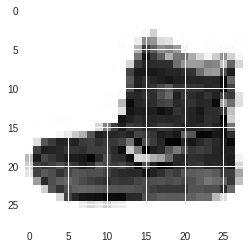

In [38]:
img = x_train[0]
plt.imshow(img)

In [41]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
input_shape = (28, 28, 1)
x_train /= 255
x_test /= 255

In [53]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Converting our integers to floats could help because floats give exact values and integers round up/down. Converting these values to floats would increase our accuracy.

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'multi-layer model built'

'multi-layer model built'

In [63]:
model.fit(x=x_train, y=y_train, epochs=5);

Epoch 1/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.4198 - acc: 0.8483
Epoch 2/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.2899 - acc: 0.8953
Epoch 3/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.2425 - acc: 0.9112
Epoch 4/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.2087 - acc: 0.9233
Epoch 5/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.1804 - acc: 0.9329


In [64]:
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print(f"Mean squared error (MSE) for test data: {test_error_rate}")

Mean squared error (MSE) for test data: [0.29288601586520674, 0.9039]


In [0]:
model.save("trained_model.h5")

In [0]:
import keras.models
model_loaded = keras.models.load_model("trained_model.h5")

Predicted value: 9 [[2.4719060e-10 1.1871004e-12 2.3108352e-13 7.6720433e-13 9.6533313e-15
  2.3267976e-05 2.1499345e-12 1.9694921e-08 2.4070962e-08 9.9997675e-01]]


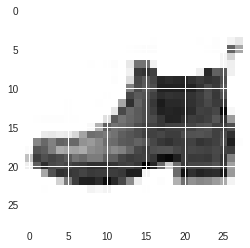

In [71]:
image_index = 3666

plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model_loaded.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted value:", pred.argmax(), pred)